## Predict car mileage using car features

I will implement the Linear Regression algorithm with squared penalization term in the objective function (Ridge Regression) using `Numpy` in `Python`. Further, we will apply the algorithm to predict the miles per gallon for a car using six features about that car. 

The data is already standardized and can be obtained here [X_train.csv](/downloads/ml-regression/X_train.csv), [X_test.csv](/downloads/ml-regression/X_test.csv), [Y_train.csv](/downloads/ml-regression/Y_train.csv) and [Y_test.csv](/downloads/ml-regression/Y_test.csv)

The input variables are anonymous except the 4th and 6th dimension which correspond to **car weight** and **car year**.

The penalization coefficient ($\lambda$) is varied and the feature weights are plotted against degree of freedoms for values of $\lambda$ ranging from 0 to 5000. 

$\lambda = 0 $ corresponds to Simple Linear Regression (no penalty)

\begin{equation} w_{rr} = arg \ \underset{w}{min}\ \left\Vert y - Xw\right\Vert^2 + \lambda\ \left\Vert w \right\Vert^2  \end{equation}
\begin{equation}
\begin{split}
L &=\ \left\Vert y - Xw \right \Vert^2 + \lambda \ \left \Vert w \right \Vert ^2 \\
 &=(y - Xw)^{T} (y - Xw) + \lambda w^T w 
\end{split}
\end{equation}

To find optimum value for $ w_{rr} $, we take the gradient of $L$ and set it to zero

\begin{equation}
\nabla L_w = -2X^Ty + 2X^TXw + 2\lambda w = 0
\end{equation}

\begin{equation}\tag{1}
w_{rr} = (\lambda I + X^TX)^{-1}X^Ty
\end{equation}

Degrees of Freedom: 

\begin{equation}\tag{2}
df(\lambda) = trace \ [X(X^TX + \lambda I)^{-1}X^T]
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

### Ridge Regression function implemented using Numpy

In [1]:
def SolveRidgeRegression(X, y):
    wRR_list = []
    df_list = []
    for i in range(0, 5001, 1):
        lam_par = i
        xtranspose = np.transpose(X)
        xtransx = np.dot(xtranspose, X)
        if xtransx.shape[0] != xtransx.shape[1]:
            raise ValueError('Needs to be a square matrix for inverse')
        lamidentity = np.identity(xtransx.shape[0]) * lam_par
        matinv = np.linalg.inv(lamidentity + xtransx)
        xtransy = np.dot(xtranspose, y)
        wRR = np.dot(matinv, xtransy)
        _, S, _ = np.linalg.svd(X)
        df = np.sum(np.square(S) / (np.square(S) + lam_par))
        wRR_list.append(wRR)
        df_list.append(df)
    return wRR_list, df_list

### Degree of Freedom Plots with varying hyperparameter, $\lambda$

In [2]:
def makeDFPlots(dfArray, wRRArray):
    #print wRR_array.shape, df_array.shape
    plt.figure()
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
    labels = ["Dimension 1", "Dimension 2", "Dimension 3", "Dimension 4 (car weight)", "Dimension 5", "Dimension 6 (car year)", "Dimension 7"]
    for i in range(0, wRR_list[0].shape[0]):
        plt.plot(dfArray, wRRArray[:,i], color = colors[i])
        plt.scatter(dfArray, wRRArray[:,i], color = colors[i], s = 8, label=labels[i])
    # df(lambda)
    plt.xlabel(r"df($\lambda$)")
    # and a legend
    plt.legend(loc='lower left')
    plt.show()

### Calling Ridge Regression on Data

In [13]:
X_train = np.genfromtxt('hw1-data/X_train.csv', delimiter=',')
y_train = np.genfromtxt('hw1-data/y_train.csv')

In [14]:
X_train

array([[ 0.30957 , -0.36707 ,  0.45545 , ..., -0.73992 , -0.80885 ,  1.      ],
       [ 0.30957 ,  0.3592  , -0.11611 , ...,  0.16625 , -0.80885 ,  1.      ],
       [-0.86291 , -0.99778 , -0.89551 , ..., -0.55868 , -0.26592 ,  1.      ],
       ..., 
       [ 0.30957 ,  0.53121 , -0.84355 , ...,  1.9786  , -0.26592 ,  1.      ],
       [ 0.30957 , -0.30018 ,  0.74123 , ...,  0.093761,  0.54847 ,  1.      ],
       [ 1.4821  ,  1.0281  ,  0.63731 , ..., -0.77616 ,  0.81993 ,  1.      ]])

In [15]:
wRR_list, df_list = SolveRidgeRegression(X_train, y_train)
wRRArray = np.asarray(wRR_list)
dfArray = np.asarray(df_list)

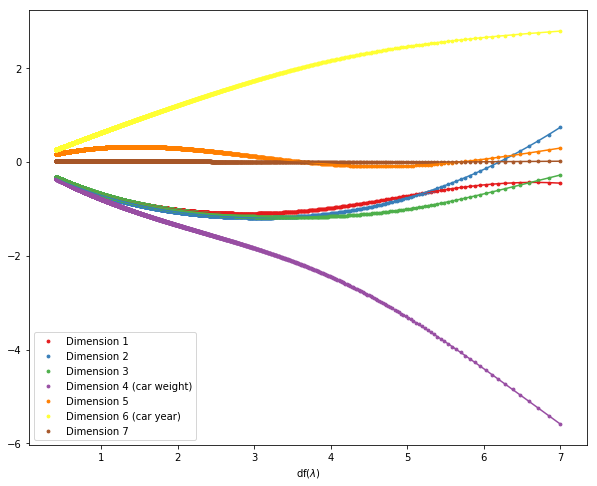

In [16]:
makeDFPlots(dfArray, wRRArray)

#### Inference about the above plot

1. From the solution, we know that when the df($\lambda$) is the maximum value, that corresponds to $\lambda$ equal to 0, which is the least squares solution. The fourth dimension (car weight) and the sixth dimension (car year) have the highest magnitude, which indicates that they are the most important features in determining the fuel efficiency for cars. As the sixth dimension it positive, it shows that the fuel efficiency increases with the increase in car years and as the fourth dimension is negative, it shows that the fuel efficiency decreases with the increase in car weight.

2. So, we can say that for the least squares solution, the dimensions 4 (car weight) and dimensions 6 (car year) are the most important dimensions which affect the solution, but because we always try and regularize the weights to be small, their weights get penalized the most by including the hyper parameter ($\lambda$) for Ridge Regression and varying it.

3. As $\lambda$ is always greater than 0, increasing the values of $\lambda$ leads to a decrease in the degrees of freedom and regularized weights for all the covariates in our solution.

## Plot RMSE values with varying hyperparameter, $\lambda$

In [7]:
X_test = np.genfromtxt('hw1-data/X_test.csv', delimiter=',')
y_test = np.genfromtxt('hw1-data/y_test.csv')

In [8]:
def plotRMSEValue(max_lamda, RMSE_list, poly):
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
    legend = ["Polynomial Order, p = 1", "Polynomial Order, p = 2", "Polynomial Order, p = 3"]
    plt.plot(xrange(len(RMSE_list)), RMSE_list, color = colors[poly])
    plt.scatter(xrange(len(RMSE_list)), RMSE_list, color = colors[poly] , s = 8, label= legend[poly-1])
    # df(lambda)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("RMSE")
    # and a legend
    plt.legend(loc='upper left')
    plt.title(r"RMSE vs $\lambda$ values for the test set, $\lambda$ = 0..%d"%(max_lamda))

In [9]:
def getRMSEValues(X_test, y_test, wRRArray, max_lamda, poly):
    RMSE_list = []
    for lamda in xrange(0, max_lamda+1):
        wRRvals = wRRArray[lamda]
        y_pred = np.dot(X_test, wRRvals)
        RMSE = np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
        RMSE_list.append(RMSE)
    plotRMSEValue(max_lamda, RMSE_list, poly=poly)

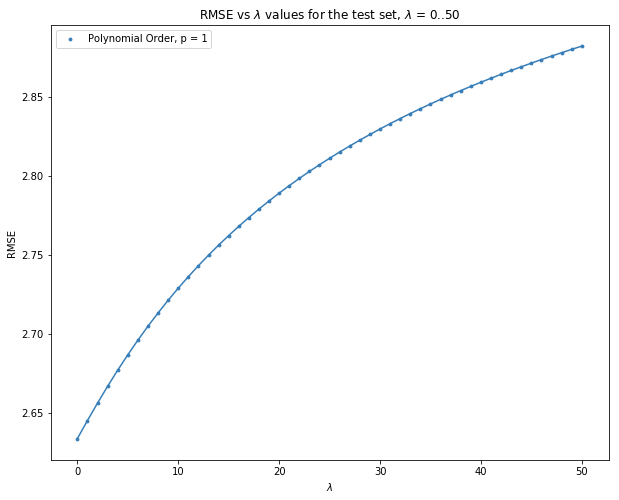

In [10]:
plt.figure()
getRMSEValues(X_test, y_test, wRRArray, max_lamda=50, poly=1)
plt.show()

From the figure, we can understand that the least RMSE value is obtained for $\lambda$ = 0 and as the value of $\lambda$ increase, the RMSE increases. Also, as $\lambda$ = 0 is the least squares solution, which gives the least RMSE value, for this particular problem, using just the polynomial order 1 covariates, we should use the least squares solution, i.e., $\lambda$ = 0 instead of using Ridge Regression (where $\lambda$ > 0).

### Ridge Regression with Polynomial Features

In [11]:
def addPolynomialOrder(input_matrix, p):
    if p == 1:
        return input_matrix
    elif p == 2:
        a = input_matrix
        b = np.power(input_matrix[:, 0:6], 2)
        out = np.hstack((a, b))
        return out
    elif p == 3:
        a = input_matrix
        b = np.power(input_matrix[:, 0:6], 2)
        c = np.power(input_matrix[:, 0:6], 3)
        out = np.hstack((a, b, c))
        return out

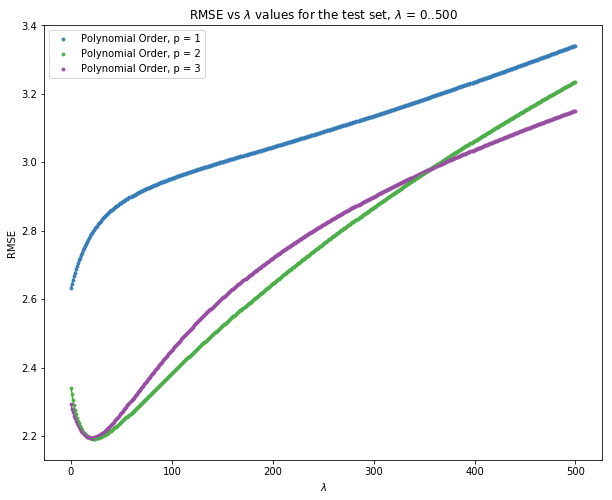

In [12]:
## Set xlimits for the graphs

plt.figure()
for i in [1, 2, 3]:
    X_train_appended = addPolynomialOrder(X_train, p = i)
    X_test_appended = addPolynomialOrder(X_test, p = i)
    wRR_list, df_list = SolveRidgeRegression(X_train_appended, y_train)
    wRRArray = np.asarray(wRR_list)
    dfArray = np.asarray(df_list)
    getRMSEValues(X_test_appended, y_test, wRRArray, max_lamda=500, poly=i)
plt.show()

** Inference of above plot : RMSE values with varying hyperparameters for different polynomial order features **

Looking at the curves, we should choose the polynomial order p = 2, as it results in the lowest RMSE value for a particular value of $\lambda$ at 21. Also at p = 3, we get nearly the same lowest RMSE value at $\lambda$ = 23, but we should choose the simpler model obtained using p = 2.

We can say that when p = 1, it produces a simpler model that underfits the data. When p = 2 or p = 3, at lower values of $\lambda$, the model fits the data better (might also overfit) and gives the least RMSE values and can be chosen. We see that on further increasing the $\lambda$ values for higher order's of p, we still underfit the data with an increase in the RMSE values.

---